# Checkpoint Regression By SERRAI Sihem Chourouk

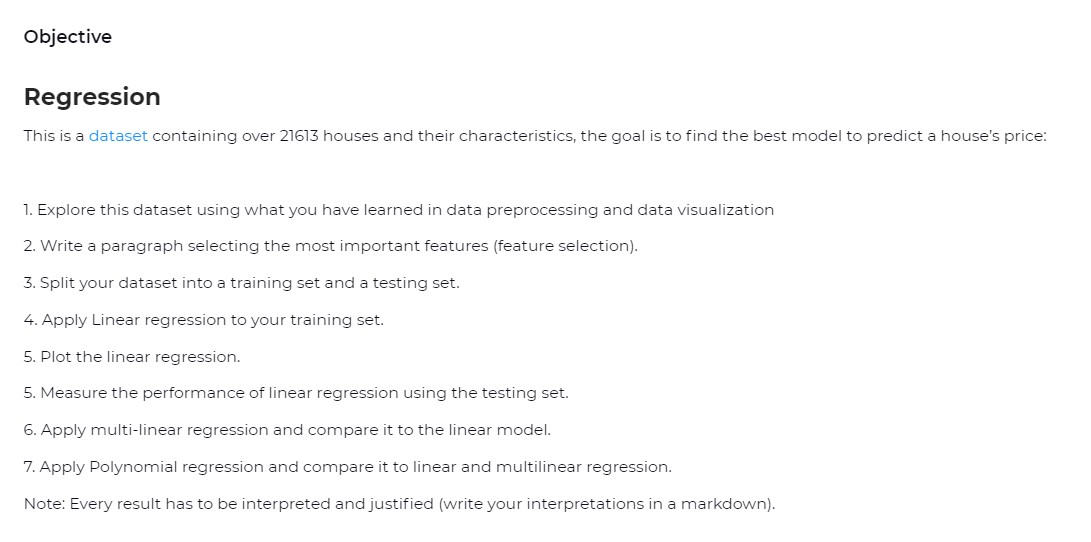

## This is a dataset containing over 21613 houses and their characteristics, the goal is to find the best model to predict a house’s price 

In [3]:
#importing numpy and pandas, seaborn
import pandas as pd #datapreprocessing
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  #for plotting graphs
sns.set_style("darkgrid")

In [4]:
Housing_file = "kc_house_data"
Housing_data = pd.read_csv("kc_house_data.csv", sep=',')
Housing_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### HEAD ELEMENTS DISPLAYED

In [5]:
Housing_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# 1. Exploring this dataset EXPLORING THE DATASET

# GENERAL INFORMATION 

In [6]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

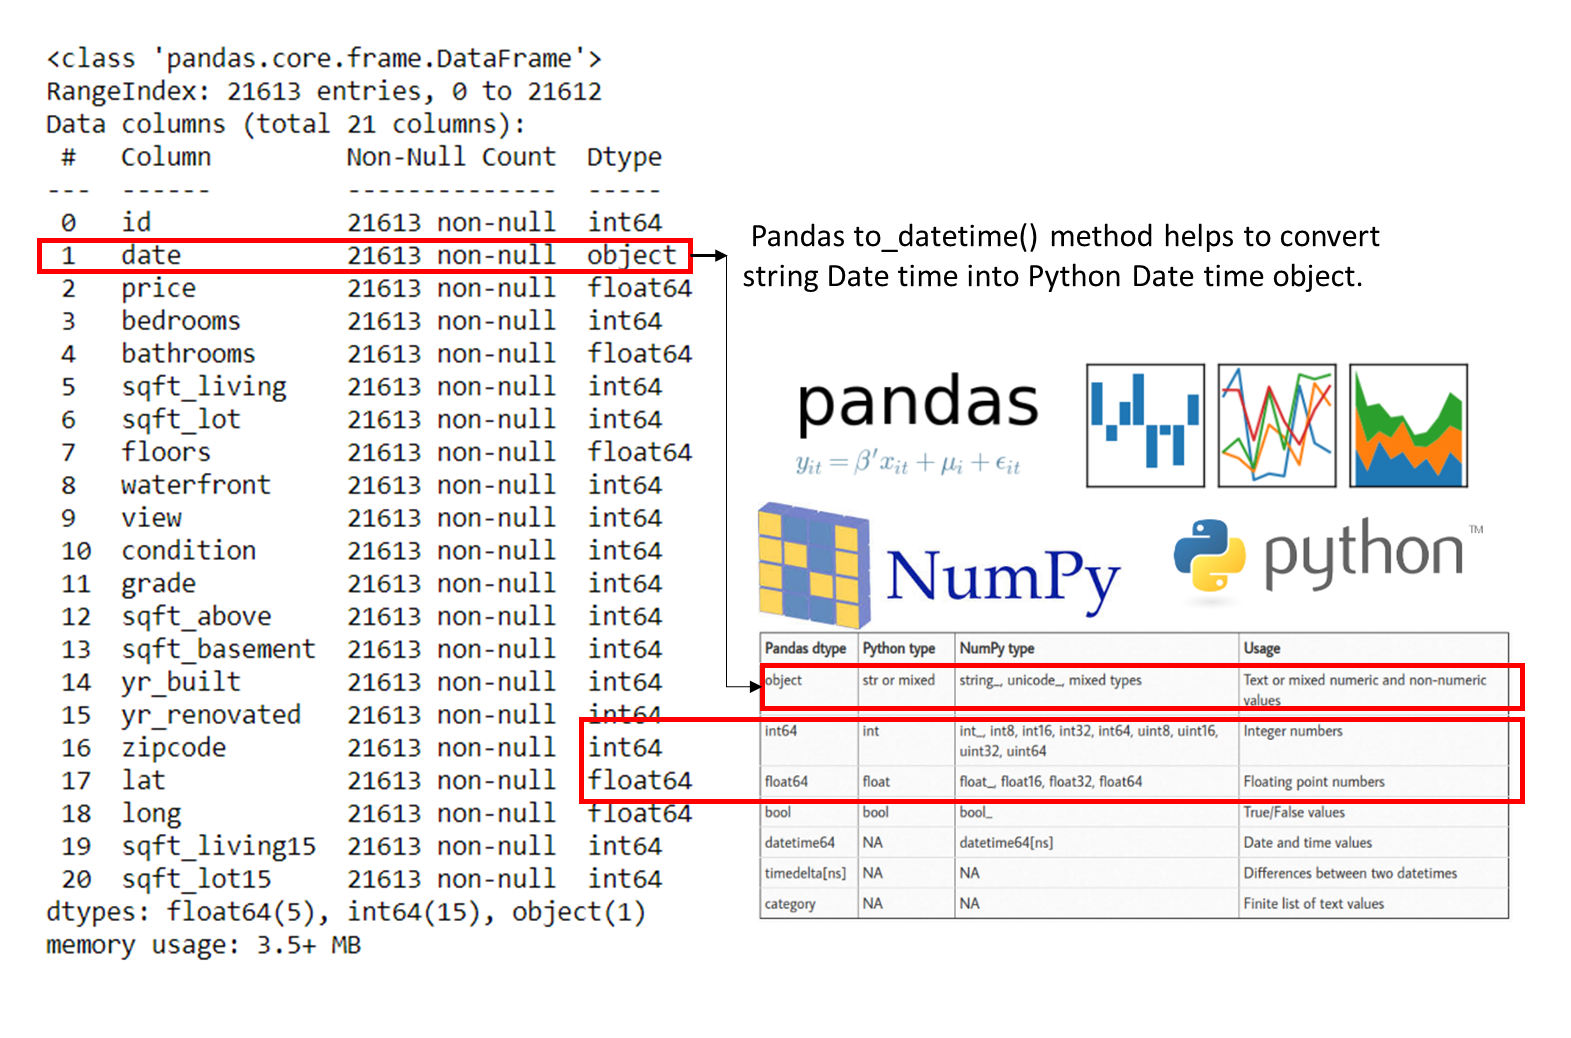

In [9]:
# Find the number of rows and columns
Housing_data.shape

(21613, 21)

## DATA PREPROCESSING AND DATA VISUALIZATION 

###  DATA CLEANING_NAN VALUE  / Missing Values

In [13]:
Housing_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Commentaire: There is no missing values

In [17]:
Housing_data["date"]= pd.to_datetime(Housing_data["date"])

In [18]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

#### Comment: Values ["date"] converted to Time and Date Value
#### All data are numeric values

# Discribe the most important features (feature selection). 

In [10]:
Housing_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

### Comment: The majority of the houses have 3 bedrooms 

In [13]:
Housing_data['waterfront'].value_counts() # only 163 houses have a waterfront 

0    21450
1      163
Name: waterfront, dtype: int64

#### Comment: Only 163 houses have a waterfront

In [16]:
Housing_data['grade'].value_counts()


7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

#### Comment: The grade determines the overall grade given to the housing unit, based on a scale of 1 to 13
### The the majority of the houses are rated 7/13 (GRADE)

In [17]:
Housing_data['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

#### condition : It determines the overall condition of a house on a scale of 1 to 5.
### The the majority of the houses are rated 3/5 (CONDITION)

# Seaborn.pairplot

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

## Studying the distribution of the most important features based on the understanding of the dataset and the problem.

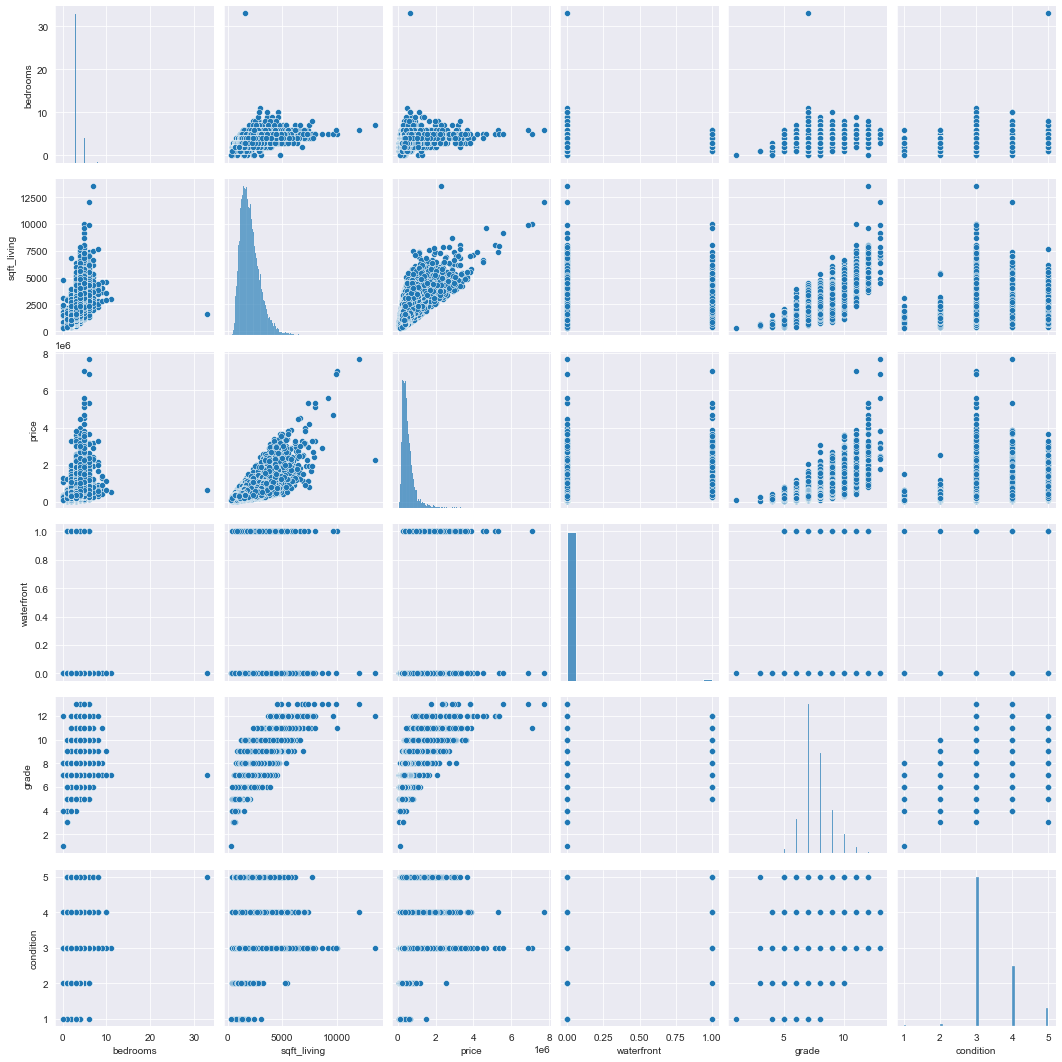

In [68]:
data= Housing_data [['bedrooms', 'sqft_living', 'price', 'waterfront', 'grade', 'condition']]

sns.pairplot(data )

#### Pairplots are a powerful tool for quickly exploring distributions and relationships in a dataset.  A pair diagram provides us with a first comprehensive look at our data and is a great starting point in data analysis projects.
### we can see the relationship between the characteristics : price Vs. sqft linving / price Vs. bedrooms  etc ... 
## Why ? we want to see how the variables  affect the target feature (price)

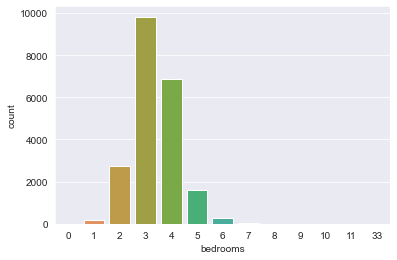

In [43]:
sns.countplot(x ='bedrooms', data = Housing_data)
# Show the plot
plt.show()


No handles with labels found to put in legend.


<AxesSubplot:title={'center':'house prices by sqft_living'}, xlabel='sqft_living', ylabel='price'>

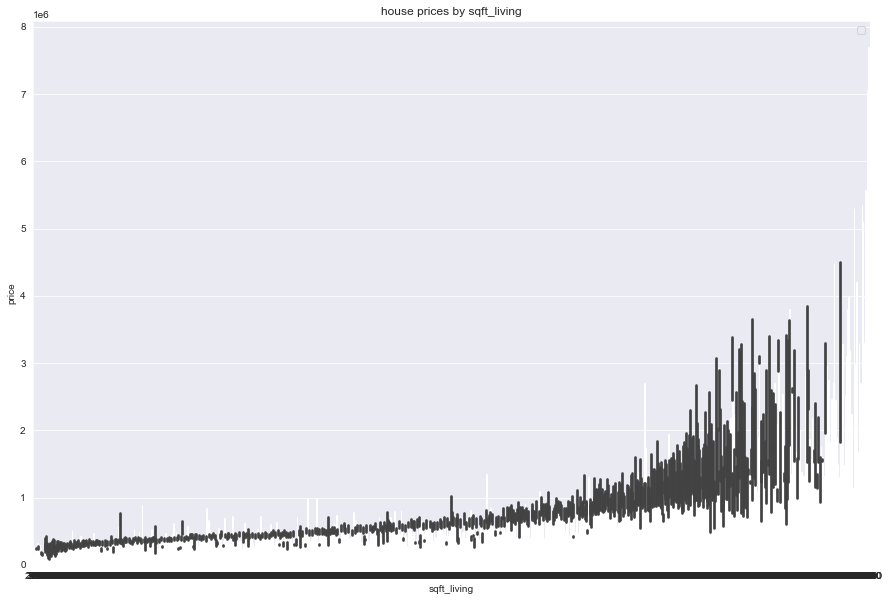

In [20]:
fig,axes= plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title('house prices by sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_living',y='price',data=Housing_data)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

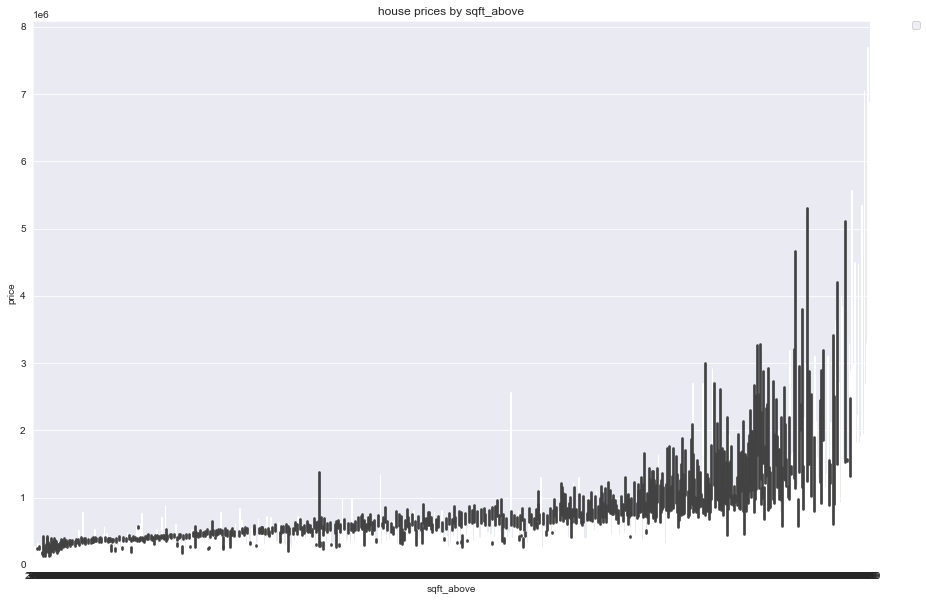

In [44]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
sns.barplot(x='sqft_above',y='price',data= Housing_data)

(array([1.825e+04, 3.255e+03, 1.010e+02, 5.000e+00, 2.000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <BarContainer object of 5 artists>)

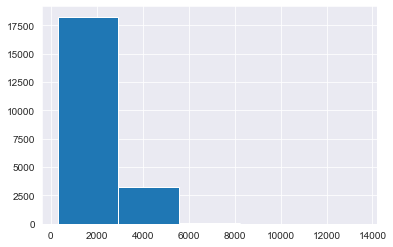

In [24]:
plt.hist('sqft_living',data= Housing_data,bins=5)

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

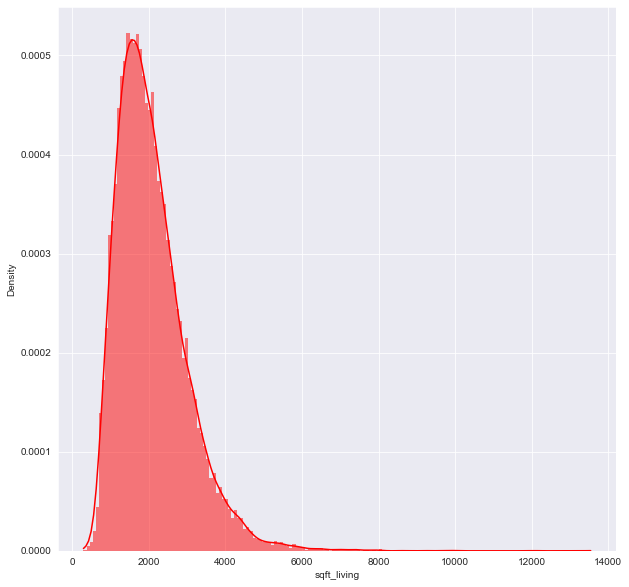

In [32]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
sns.histplot(Housing_data['sqft_living'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

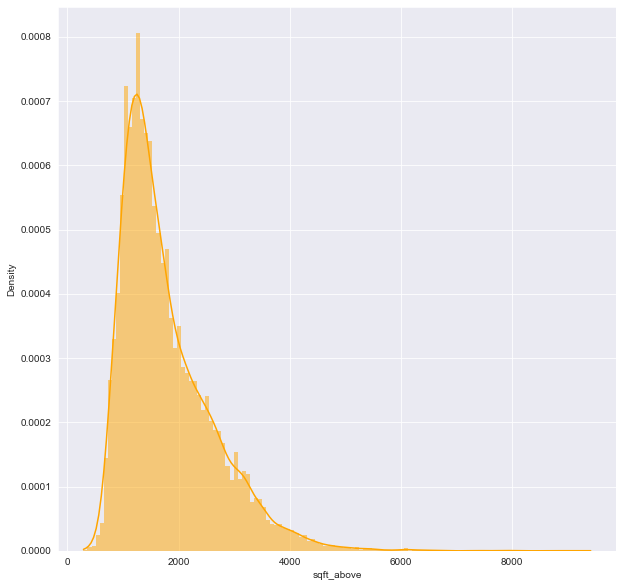

In [33]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
sns.histplot(Housing_data['sqft_above'], color="orange", label="100% Equities", kde=True, stat="density", linewidth=0)


In [34]:
print('Mean',round(Housing_data['sqft_living'].mean(),2))
print('Median',Housing_data['sqft_living'].median())
print('Mode',Housing_data['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


In [35]:
len(Housing_data[Housing_data['sqft_living']==1300])

138

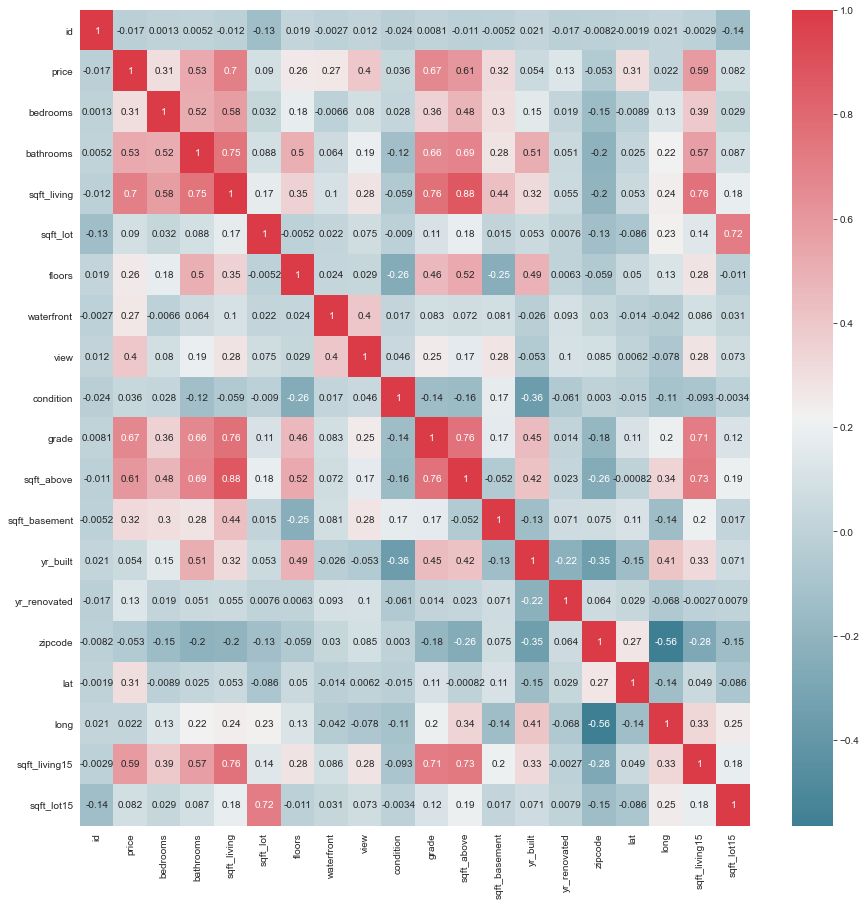

In [36]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,15))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(Housing_data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(Housing_data)

# The most important features (feature selection)
## To discribe this correlation map, we have to focuse on feature target (price)
## We can see that we have variables with positive correlation more than 0.5 
## price . bathrooms -- 0.53 / price. sqft living -- 0.7 / price. garde -- 0.67 / price. sqft. above -- 0.61 / price. sqft_living 15-- 0.59


# Having described and visualized the data set, we can now find the price prediction model based on the housing data. 
# Simple Linear Regression ? Multiple Regression or Polynomial Regression ? We will see in function of R2 

## Simple Linear Regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [57]:
train_data,test_data=train_test_split(Housing_data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 254289.15
R squared training 0.492
R sqaured testing 0.496
intercept [-47235.8113029]
coefficient [[282.2468152]]


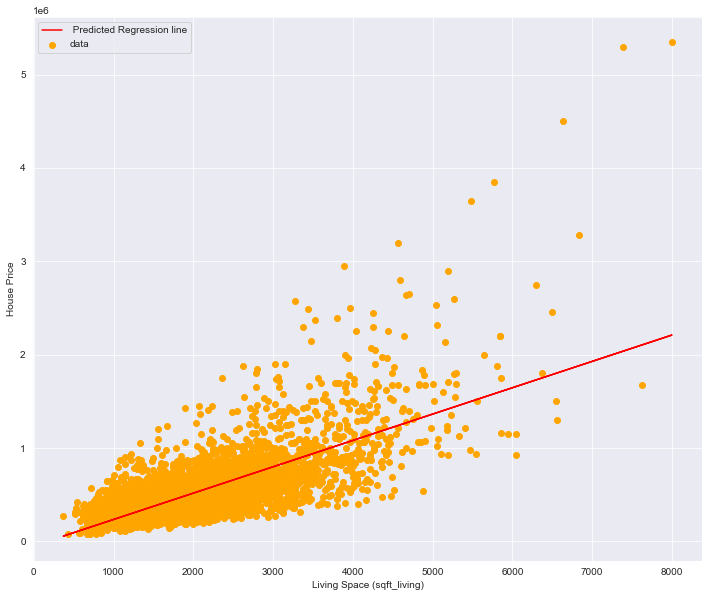

In [58]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'orange', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft_living)')
plt.ylabel('House Price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [59]:
train_data,test_data=train_test_split(Housing_data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

linear model
squared mean error 263387.61
R squared training 0.442
R squared testing 0.46
intercept [-1061459.62144314]
coeeficient [[209225.48270386]]


## linear model  rejected -- R squared testing 0.46 badly weak 

In [ ]:
train_data,test_data=train_test_split(Housing_data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['condition']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['condition']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

In [61]:
train_data,test_data=train_test_split(Housing_data,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['waterfront']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['waterfront']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

linear model
squared mean error 341557.49
R squared training 0.066
R squared testing 0.091
intercept [531816.55254415]
coeeficient [[1086488.27452351]]


## linear model  rejected -- R squared testing 0.091 badly weak 


## Multiple Regression

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

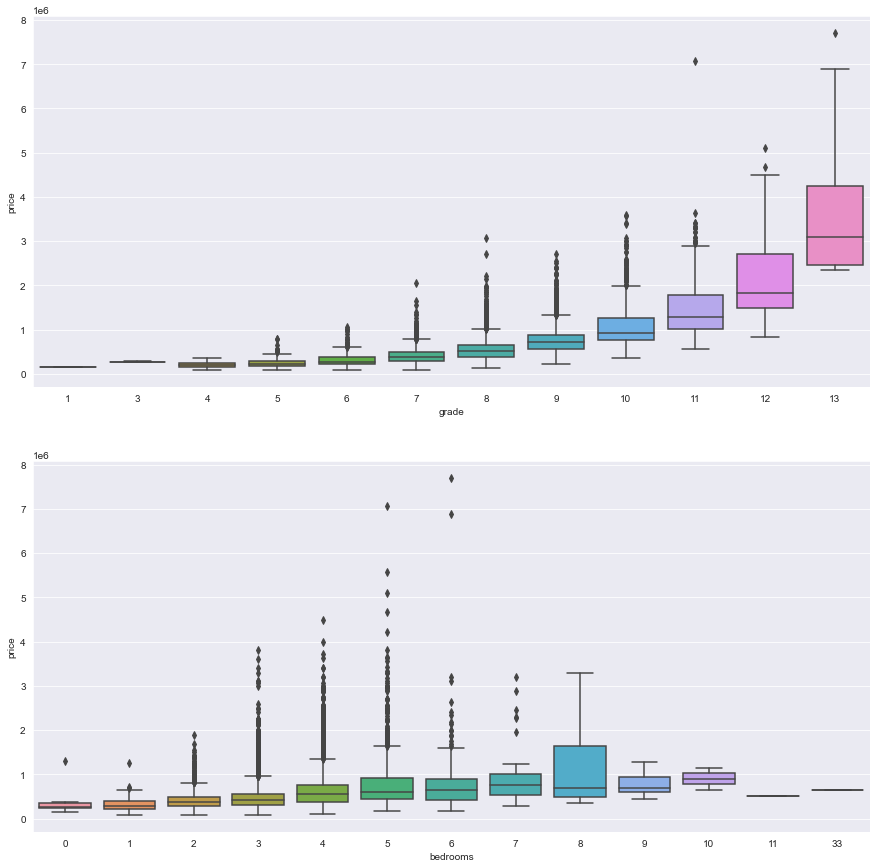

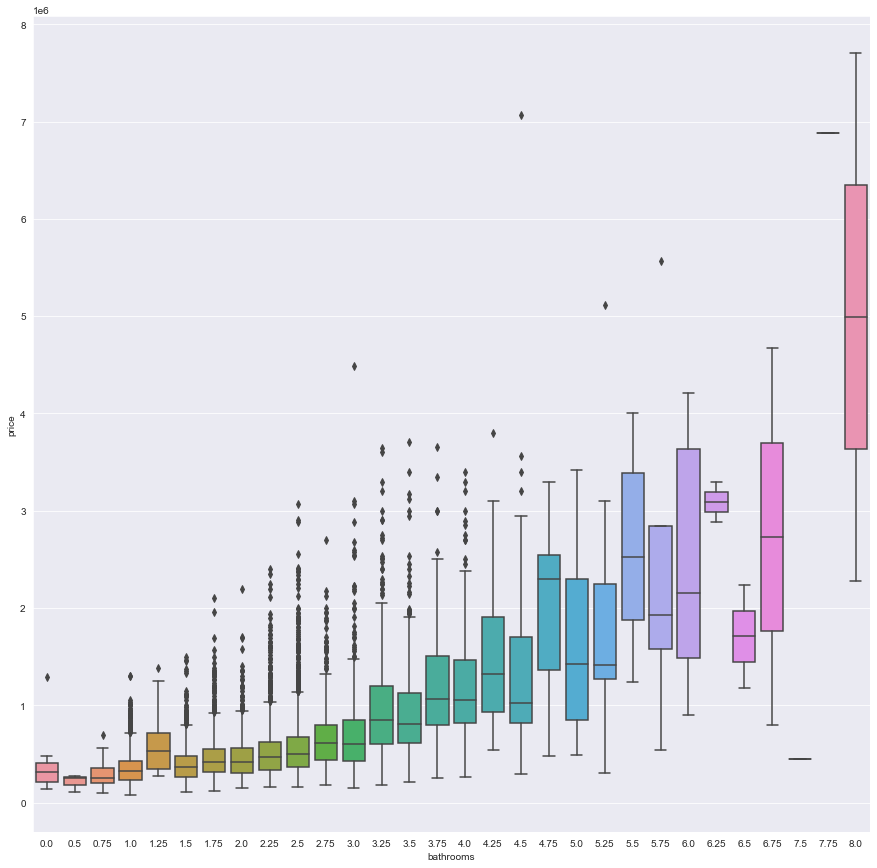

In [62]:
fig,ax=plt.subplots(2,1,figsize=(15,15))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,15))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])

In [63]:
features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

complex_model 1
mean squared error(MSE) 239014.4
R squared training 0.548
R squared training 0.555
Intercept:  -523645.7841467742
Coefficient: [-4.33050242e+04  1.03455986e+05  2.73023590e+02 -8.38875593e+01]


## complex_model 1  rejected -- R squared testing 0.555 -- an average score 

In [64]:
features1 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Complex Model_2
Mean Squared Error (MSE)  205244.56
R-squared (training)  0.655
R-squared (testing)  0.672
Intercept:  -32330182.91167583
Coefficient: [-2.62100082e+04 -3.47626774e+03  1.32069090e+02 -1.31506101e-01
 -3.22608866e+04  5.65731080e+05  6.81843494e+04  8.17559446e+04
  6.62246805e+01  6.58444098e+01  6.71765072e+05  4.60648979e+00]


## complex_model 2 rejected -- R squared testing 0.672 -- better than the previous models but we can do it well, let's see with Polynomial Regression 

## Polynomial Regression


In [65]:
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  175811.42
R-squared (training)  0.758
R-squared (testing)  0.759


In [66]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('complex model_4')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

complex model_4
Mean Squared Error (MSE)  197368.11
R-squared (training)  0.776
R-squared (testing)  0.697


# Observation/Result

# Complex Model_3 gives us R-squared (testing) score of 0.759. From above reports,we can conclude that Polynomial regression is best solution.